In [1]:
import PIL

In [4]:
dir(PIL)

['Image',
 'ImageMode',
 'PILLOW_VERSION',
 'TiffTags',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_imaging',
 '_plugins',
 '_util']

In [2]:
from PIL import Image

In [5]:
# 클래스일 줄 알았건만 모듈이었다

type(Image)

module

In [6]:
dir(Image)

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HAS_PATHLIB',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'PILLOW_VERSION',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',

In [8]:
type(Image.open)

function

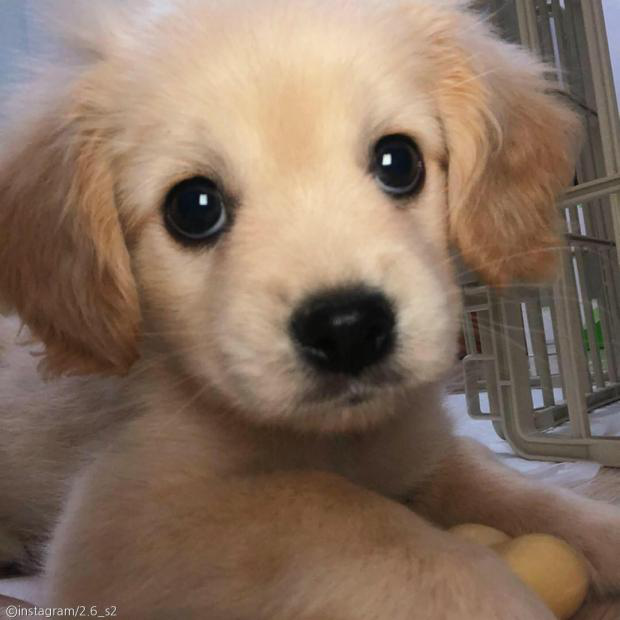

In [20]:
Image.open('practice/1.jpg')

# open
python의 open입니다.  
PIL의 open이 나온김에 헷갈리지 않게 파이썬 개념 짚고 넘어가기...

In [9]:
%%writefile practice/sun.txt
asdfasdf
afefsd
asdfeafsdfae

Writing practice/sun.txt


> 파이썬의 open은 두가지 타입을 지원한다.
    - binary 파일
    - text 파일

In [16]:
f = open("practice/sun.txt")
dir(f)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'reconfigure',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'write_through',
 'writelines']

In [17]:
# __iter__ 가 있다 => 내부구조가 iterator/generator이다.
# nexr를 쓸 수 있다.

next(f)

'asdfasdf\n'

In [18]:
# open은 항상 사용 후에 close를 써줘야한다.

f.close()

In [11]:
with open("practice/sun.txt") as f:
    print(f.read())

asdfasdf
afefsd
asdfeafsdfae



> - `with`문은 `__enter__`와 `__exit__`를 해줘야하는 기능을 자동으로 처리해준다.
- `open`은 `__exit__`가 `.close()`이다.
- as는 with문 내에서 할당의 개념이다. 

다시 PIL로 돌아가자

In [22]:
im = Image.open('practice/1.jpg')

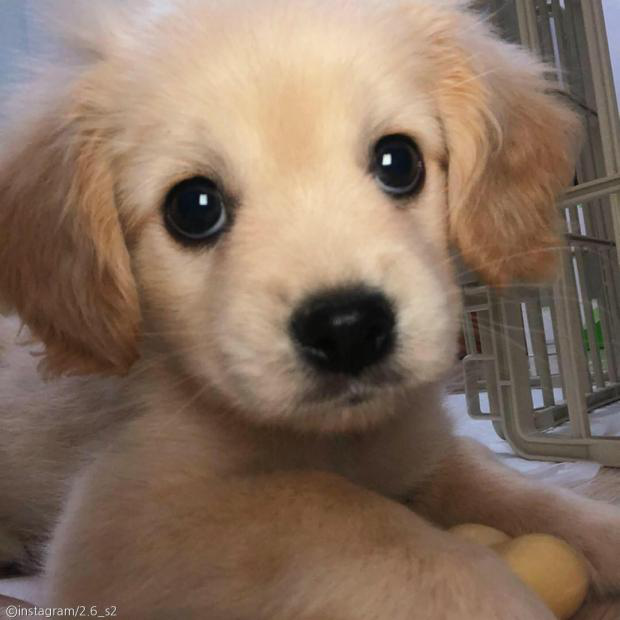

In [23]:
im

> PIL이 워낙 많이 쓰이는 라이브러리라서 jupyter notebook에서는 imshow 함수를 쓰지 않아도 이미지를 자동으로 띄워주는 기능이 있다.
- 타 개발환경에서는 원래 imshow 함수를 활용해야 볼 수 있다.

In [24]:
import inspect
print(inspect.getsource(im.__exit__))

    def __exit__(self, *args):
        if hasattr(self, "fp") and getattr(self, "_exclusive_fp", False):
            if hasattr(self, "_close__fp"):
                self._close__fp()
            if self.fp:
                self.fp.close()
        self.fp = None



> - `PIL.Image.open`도 사용하고 나면 `close`로 닫아줘야한다.
- 닫지 않으면 메모리 상에 계속 용량을 차지하고 있는다.
- 닫고 난 뒤에는 더 이상 수정할 수가 없다.

In [25]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

> - numpy로 만들어졌지만 numpy객체가 아니라 PIL의 객체이다.

In [27]:
[_ for _ in dir(im) if "array" in _]

['__array_interface__']

> - 'array'가 붙은 녀석이 있으면 다 numpy에 관련된 기능이다.
- PIL은 numpy로 만들어진게 맞다.

In [28]:
im.format

'JPEG'

In [29]:
im.width, im.height

(620, 620)

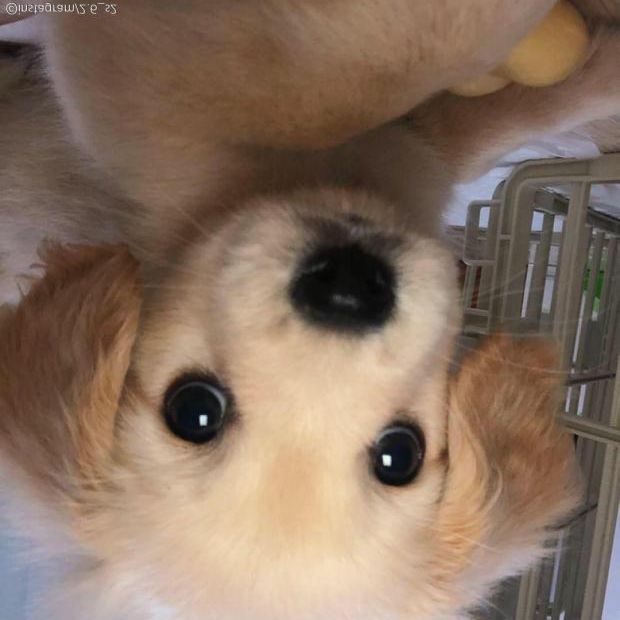

In [35]:
im.transpose(Image.FLIP_TOP_BOTTOM)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

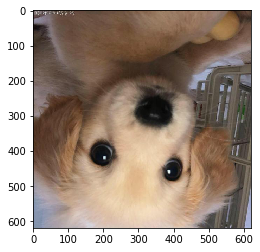

In [44]:
plt.imshow(np.array(im)[::-1,:,:])

> numpy로도 똑같이 할 수 있다. => numpy로도 전처리 가능하다

In [51]:
Image.TRANSVERSE

6

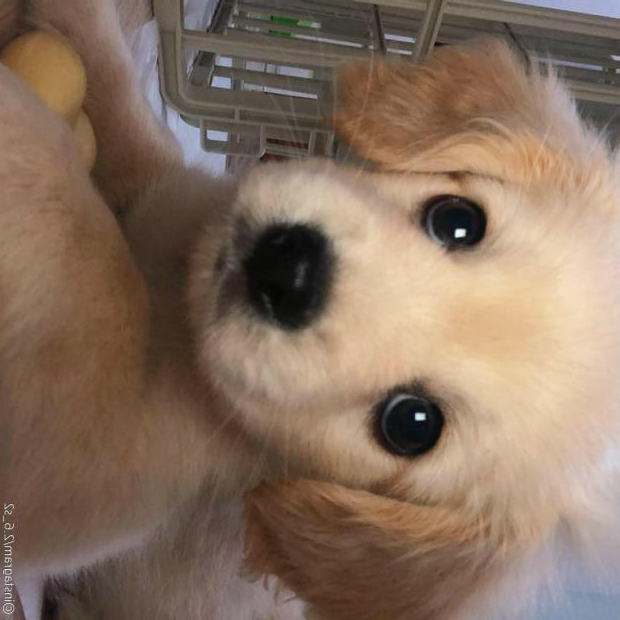

In [45]:
im.transpose(6)

> - 파이썬 관례상 대문자는 상수이다.
- 대응하는 숫자를 넣어도 똑같이 동작한다.